In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
import datetime as dt
import matplotlib.pyplot as plt

df = pd.read_csv("GroupExam2024_data_and_documentation/elektronisk-rapportering-ers-2018-fangstmelding-dca-simple.csv", sep=';', decimal=',')
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)
# Fiskeridirektoratets kart: https://portal.fiskeridir.no/portal/apps/webappviewer/index.html?id=ea6c536f760548fe9f56e6edcc4825d8


In [3]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305434 entries, 0 to 305433
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Melding ID                305434 non-null  int64  
 1   Meldingstidspunkt         305434 non-null  object 
 2   Meldingsdato              305434 non-null  object 
 3   Meldingsklokkeslett       305434 non-null  object 
 4   Starttidspunkt            305434 non-null  object 
 5   Startdato                 305434 non-null  object 
 6   Startklokkeslett          305434 non-null  object 
 7   Startposisjon bredde      305434 non-null  float64
 8   Startposisjon lengde      305434 non-null  float64
 9   Hovedområde start (kode)  303433 non-null  float64
 10  Hovedområde start         301310 non-null  object 
 11  Lokasjon start (kode)     303433 non-null  float64
 12  Havdybde start            305434 non-null  int64  
 13  Stopptidspunkt            305434 non-null  o

In [4]:
print(df.head())

   Melding ID Meldingstidspunkt Meldingsdato Meldingsklokkeslett  \
0     1497177        01.01.2018   01.01.2018               00:00   
1     1497178        01.01.2018   01.01.2018               00:00   
2     1497178        01.01.2018   01.01.2018               00:00   
3     1497178        01.01.2018   01.01.2018               00:00   
4     1497178        01.01.2018   01.01.2018               00:00   

     Starttidspunkt   Startdato Startklokkeslett  Startposisjon bredde  \
0        31.12.2017  31.12.2017            00:00               -60.350   
1  30.12.2017 23:21  30.12.2017            23:21                74.885   
2  30.12.2017 23:21  30.12.2017            23:21                74.885   
3  30.12.2017 23:21  30.12.2017            23:21                74.885   
4  30.12.2017 23:21  30.12.2017            23:21                74.885   

   Startposisjon lengde  Hovedområde start (kode) Hovedområde start  \
0               -46.133                       NaN               NaN   
1   

In [5]:
# Antall registreringer med dei forskjellige Hovedarter.
print(df['Hovedart FAO'].value_counts())

Hovedart FAO
Torsk                            86215
Sei                              66311
Dypvannsreke                     36977
Hyse                             28176
Lange                            13387
Øyepål                            7796
Brosme                            7168
Sild                              6846
Kolmule                           6166
Snøkrabbe                         6070
Snabeluer                         6065
Lysing                            5964
Blåkveite                         4986
Breiflabb                         2552
Tobis og annen sil                2064
Lodde                             1378
Hestmakrell                       1224
Makrell                           1146
Vassild                           1120
Flekksteinbit                      896
Uer (vanlig)                       785
Lyr                                780
Stortare                           683
Rødspette                          615
Antarktisk krill                   552
Brisling    

In [6]:
# Få oversikt over hovedområder.
hovedområder = df.groupby(df['Hovedområde start'], as_index= False).agg(
    {'Hovedområde start': 'first', 'Hovedområde start (kode)': 'first'}
    )
print(hovedområder)

                Hovedområde start  Hovedområde start (kode)
0                Admiralityfeltet                      16.0
1                        Bjørnøya                      20.0
2                   Britvinfeltet                      14.0
3                  Danmarkstredet                      61.0
4                 Eigersundbanken                       8.0
5                     Flemish Cap                      81.0
6                     Fyllas Bank                      68.0
7                     Færøybanken                      58.0
8                       Gammelock                      62.0
9                  Grønlandshavet                      26.0
10                     Gåsebanken                      11.0
11               Helgelandsbanken                       6.0
12                          Hopen                      23.0
13                    Kaninbanken                       1.0
14                 Murmanskkysten                       2.0
15         Nord av Horn  (Island)       

In [7]:
print(df['Hovedområde start'].value_counts())

Hovedområde start
Eigersundbanken                  45349
Røstbanken til Malangsgrunnen    29099
Vest-Finnmark                    27711
Øst-Finnmark                     26995
Bjørnøya                         25265
Shetland                         24813
Nordkappbanken                   18635
Vikingbanken                     16600
Skagerrak                        16097
Storegga-Frøyabanken             14884
Helgelandsbanken                  8591
Sentralbanken                     5584
Storbanken                        4823
Thor Iversens Bank                4551
Vestfjorden (Lofoten)             4469
Sentrale Nordsjø                  3387
Hopen                             3161
Vest av Skottland (Hebridene)     2008
Sørlige Norskehav                 1990
Østlige Norskehav                 1936
Admiralityfeltet                  1909
Skolpenbanken                     1904
Gåsebanken                        1699
Storfjord/Hinlopenstredet         1363
Vest-Spitsbergen                  1242
Vest av

In [8]:
eigersundbanken = df[df['Hovedområde start'] == 'Eigersundbanken']
eigersundbanken['Hovedart FAO'].value_counts()

Hovedart FAO
Dypvannsreke            15214
Sei                      8117
Øyepål                   4813
Torsk                    3586
Lysing                   3244
Kolmule                  3148
Breiflabb                1347
Tobis og annen sil       1177
Sild                     1105
Hestmakrell               850
Lange                     484
Hyse                      383
Lyr                       246
Strømsild                 199
Strømsild/Vassild         163
Rødspette                 161
Brosme                     81
Gråsteinbit                79
Sølvtorsk                  70
Sjøkreps                   69
Hvitting                   31
Stortare                   26
Makrell                    25
Skjellbrosme               21
Steinbiter                 20
Kveite                     17
Lomre                      15
Pigghå                     13
Annen torskefisk           12
Annen skate og rokke       12
Rognkjeks (felles)          8
Hakes nei. *                8
Flekksteinbit              

In [9]:
# Antall fiskeaktiviteter kor dei forskjellige fiskearter er fanga.
print(df['Art FAO'].value_counts())

Art FAO
Torsk                            56574
Sei                              42557
Hyse                             39120
Lange                            17338
Uer (vanlig)                     14153
Dypvannsreke                     13678
Brosme                            9167
Lysing                            8839
Breiflabb                         8543
Blåkveite                         8046
Flekksteinbit                     8037
Snøkrabbe                         6070
Sild                              6006
Kveite                            5649
Snabeluer                         5408
Gråsteinbit                       5389
Lyr                               4863
Makrell                           3013
Smørflyndre                       2869
Kolmule                           2843
Annen marin fisk                  2378
Øyepål                            2210
Rødspette                         2206
Hvitting                          2175
Annen skate og rokke              2136
Blåsteinbit      

In [10]:
# Antall registreringer av fisk som ikkje er hovedart.
condition = df[(df['Hovedart FAO'] != df['Art FAO'])]
condition['Art FAO'].value_counts()

Art FAO
Torsk                   31512
Hyse                    31341
Sei                     23976
Lange                   14924
Uer (vanlig)            13906
Breiflabb                8145
Brosme                   8072
Flekksteinbit            7888
Lysing                   7585
Blåkveite                5698
Kveite                   5623
Gråsteinbit              5355
Lyr                      4745
Snabeluer                3733
Smørflyndre              2862
Annen marin fisk         2326
Makrell                  2193
Hvitting                 2111
Annen skate og rokke     2108
Blåsteinbit              2104
Rødspette                2025
Skjellbrosme             1396
Sild                     1195
Øyepål                   1106
Kolmule                  1062
Blålange                  982
Strømsild                 900
Skate, uspesifisert       900
Havmus                    841
Lomre                     766
Sølvtorsk                 746
Hestmakrell               738
Steinbiter                608
Sj

In [11]:
# Finne ut hvilke typer fisk som ofte blir fanget sammen med Torsk eller Hyse
condition = df[df['Hovedart FAO'] == 'Torsk']
condition['Art FAO'].value_counts()

Art FAO
Torsk                   25062
Hyse                    17890
Sei                     10380
Uer (vanlig)             5813
Flekksteinbit            5695
Blåkveite                3407
Gråsteinbit              3093
Lange                    2345
Snabeluer                2002
Brosme                   1777
Kveite                   1534
Blåsteinbit              1371
Breiflabb                 963
Annen marin fisk          828
Rødspette                 818
Lysing                    645
Lyr                       530
Annen skate og rokke      375
Lomre                     263
Hvitting                  252
Steinbiter                216
Smørflyndre               137
Annen flyndre             135
Gapeflyndre               113
Piggvar                   105
Pigghå                     68
Makrell                    66
Glassvar                   53
Dypvannsreke               38
Skater, upes.              36
Uer uspes.                 24
Slettvar                   21
Skjellbrosme               20
Ak

In [12]:
# Uer (vanlig) er en trua art, og ikkje noko som ein ønsker hverken som hoved eller bifangst. Kan vere interessant å sjå litt meir på.
# Finne ut kva fiskeredskap det er aktuelt å søke igjennom:
condition = df[(df['Hovedart FAO'] == 'Torsk')]
condition['Redskap FDIR'].value_counts()

Redskap FDIR
Bunntrål             36535
Snurrevad            24620
Andre liner          14808
Udefinert garn        7686
Snurpenot/ringnot      735
Settegarn              520
Reketrål               325
Dobbeltrål             300
Udefinert trål         272
Bunntrål par           233
Juksa/pilk              19
Flytetrål par            6
Name: count, dtype: int64

Step 1: Filter and Create a Copy

If df is your base DataFrame from which you're working (after applying your initial conditions), make a copy immediately after filtering to avoid any ambiguity about whether you're working on a copy or a view.

In [13]:
# Filter og copy!
pd.reset_option('display.max_rows') 

# Aktuelle redskaper å bruke: Bunntrål, Snurrevad og muligens Andre Liner. evt, dobbeltål
# Unngå garn.
# Aktuelle fisketyper å bruke hovedfangst: Torsk og Hyse.
fish_types = ['Torsk', 'Hyse', 'Sei']
# Aktuelle Redskaper: Bunntrål, Snurrevad, Andre liner, (Dobbeltrål)
tools = ['Bunntrål']  # , 'Snurrevad', 'Andre liner'
# Aktuelle områder:
areas = [x for x in range(0, 70)] # alle hovedområder minus antarktis og fiske i andre hav.
condition_3 = df['Hovedområde start (kode)'].isin(areas)
condition_1 = df['Hovedart FAO'].isin(fish_types) 
condition_2 = df['Redskap FDIR'].isin(tools)
combined_condition = condition_1 & condition_2 & condition_3
filtered_df = df[combined_condition].copy()
filtered_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 86132 entries, 1 to 305433
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Melding ID                86132 non-null  int64  
 1   Meldingstidspunkt         86132 non-null  object 
 2   Meldingsdato              86132 non-null  object 
 3   Meldingsklokkeslett       86132 non-null  object 
 4   Starttidspunkt            86132 non-null  object 
 5   Startdato                 86132 non-null  object 
 6   Startklokkeslett          86132 non-null  object 
 7   Startposisjon bredde      86132 non-null  float64
 8   Startposisjon lengde      86132 non-null  float64
 9   Hovedområde start (kode)  86132 non-null  float64
 10  Hovedområde start         86132 non-null  object 
 11  Lokasjon start (kode)     86132 non-null  float64
 12  Havdybde start            86132 non-null  int64  
 13  Stopptidspunkt            86132 non-null  object 
 14  Stoppdato 

Step 2: Modify the DataFrame

Now, when you modify df, you're clearly working on a copy, so operations like adding or modifying columns won't raise warnings about potential ambiguity.

In [14]:
# Sjekker ut value_count() av Startklokkeslett og stoppklokkeslett, og ser at det er uforholdsmessig mye registreringer på startklokkeslett rundt 00.00.
# Sjekker ut tilsvarende av Stoppklokkeslett og ser at Stoppklokkeslettet er jevnere fordelt. 
# Vurderer stoppklokkeslett til å være en bedre indikator på når fiske har pågått.
print(filtered_df['Startklokkeslett'].value_counts())
print(filtered_df['Stoppklokkeslett'].value_counts())
# Ser av resultatene at Startklokkeslett har mye konsentrasjon av registreringer rundt 00.00.  Stoppklokkeslett har noe mer fordelt.
# Trolig bedre å bruke Stoppklokkeslett.

Startklokkeslett
23:45    146
20:30    138
14:00    130
11:25    121
23:25    120
        ... 
14:20     20
20:36     20
01:39     18
08:08     18
14:55     15
Name: count, Length: 1440, dtype: int64
Stoppklokkeslett
00:01    326
00:02    217
12:00    176
00:10    170
11:00    169
        ... 
23:57     10
23:52      8
23:50      8
23:55      6
23:58      2
Name: count, Length: 1439, dtype: int64


In [15]:
filtered_df.loc[:, 'Bruttotonnasje kombinert'] = filtered_df['Bruttotonnasje 1969'].fillna(filtered_df['Bruttotonnasje annen'])

for start_stop in ['Startklokkeslett', 'Stoppklokkeslett']:
    # Konvertere klokkeslett til relevant verdi
    filtered_df[start_stop] = pd.to_datetime(filtered_df[start_stop], format='%H:%M').dt.strftime('%H-%M')
    # Konverter til Desimal-timer.
    filtered_df[f'{start_stop}_DecimalHours'] = filtered_df[start_stop].str.split('-').apply(lambda x: int(x[0]) + int(x[1]) / 60)
    # Konverter til Radianer.
    filtered_df[f'{start_stop}_Radians'] = filtered_df[f'{start_stop}_DecimalHours'] * (2 * np.pi / 24)
    # Regne ut sinus og cosinus.
    filtered_df[f'{start_stop}_TimeSin'] = np.sin(filtered_df[f'{start_stop}_Radians'])
    filtered_df[f'{start_stop}_TimeCos'] = np.cos(filtered_df[f'{start_stop}_Radians'])
    filtered_df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 86132 entries, 1 to 305433
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Melding ID                     86132 non-null  int64  
 1   Meldingstidspunkt              86132 non-null  object 
 2   Meldingsdato                   86132 non-null  object 
 3   Meldingsklokkeslett            86132 non-null  object 
 4   Starttidspunkt                 86132 non-null  object 
 5   Startdato                      86132 non-null  object 
 6   Startklokkeslett               86132 non-null  object 
 7   Startposisjon bredde           86132 non-null  float64
 8   Startposisjon lengde           86132 non-null  float64
 9   Hovedområde start (kode)       86132 non-null  float64
 10  Hovedområde start              86132 non-null  object 
 11  Lokasjon start (kode)          86132 non-null  float64
 12  Havdybde start                 86132 non-null  int

Step 3: Drop Unnecessary Columns

Then, you proceed to drop the columns you don't need. This is done directly on combined_df, which is already a separate entity from your original DataFrame.

In [16]:

filtered_df = filtered_df.drop(columns = [
    'Fangstår', 
    #'Melding ID', 
    'Meldingstidspunkt', 
    'Meldingsdato',
    'Meldingsklokkeslett', 
    'Starttidspunkt',
    'Startklokkeslett',
    'Hovedområde start (kode)', 
    'Hovedområde start',
    'Lokasjon start (kode)', 
    'Havdybde start', 
    'Stopptidspunkt',
    'Varighet',
    'Stoppdato', 
    'Startposisjon bredde',
    'Startposisjon bredde',
    #'Stoppklokkeslett', 
    #'Stopposisjon bredde', 
    #'Stopposisjon lengde',
    'Hovedområde stopp (kode)', 
    'Hovedområde stopp',
    'Lokasjon stopp (kode)', 
    'Redskap FAO (kode)', 
    'Redskap FDIR (kode)',
    'Hovedart FAO (kode)',
    'Hovedart - FDIR (kode)', 
    'Art FAO (kode)', 
    #'Art FAO',
    'Art - FDIR (kode)', 
    'Art - FDIR', 
    'Art - gruppe (kode)',
    #'Art - gruppe', 
    'Lengdegruppe (kode)', 
    'Lengdegruppe',
    'Bredde',
    'Fartøylengde',
    'Bruttotonnasje 1969',
    'Bruttotonnasje annen'
    ])
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86132 entries, 1 to 305433
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Melding ID                     86132 non-null  int64  
 1   Startdato                      86132 non-null  object 
 2   Startposisjon lengde           86132 non-null  float64
 3   Stoppklokkeslett               86132 non-null  object 
 4   Stopposisjon bredde            86132 non-null  float64
 5   Stopposisjon lengde            86132 non-null  float64
 6   Havdybde stopp                 86132 non-null  int64  
 7   Trekkavstand                   86126 non-null  float64
 8   Redskap FAO                    86132 non-null  object 
 9   Redskap FDIR                   86132 non-null  object 
 10  Hovedart FAO                   86132 non-null  object 
 11  Art FAO                        86132 non-null  object 
 12  Art - gruppe                   86132 non-null  obj

In [17]:
def join_unique_values(series):
    return ', '.join(series.dropna().astype(str).unique())

# Gruppere df og slå sammen rader som kommer av samme aktivitet:
grouped_df = filtered_df.groupby(['Melding ID', 'Stoppklokkeslett'], as_index= False).agg({
    'Stopposisjon lengde': 'first',
    'Stopposisjon bredde': 'first',
    'Stoppklokkeslett': 'first',
    'Stoppklokkeslett_DecimalHours': 'first',
    'Stoppklokkeslett_Radians': 'first',
    'Stoppklokkeslett_TimeSin': 'first',
    'Havdybde stopp': 'last',
    'Trekkavstand': 'first',  
    'Redskap FDIR': join_unique_values,
    'Hovedart FAO': 'first',  
    'Art FAO': join_unique_values,
    'Art - gruppe': join_unique_values,
    'Rundvekt': 'sum',   
    'Bruttotonnasje kombinert': 'first'
})

grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23096 entries, 0 to 23095
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Melding ID                     23096 non-null  int64  
 1   Stopposisjon lengde            23096 non-null  float64
 2   Stopposisjon bredde            23096 non-null  float64
 3   Stoppklokkeslett               23096 non-null  object 
 4   Stoppklokkeslett_DecimalHours  23096 non-null  float64
 5   Stoppklokkeslett_Radians       23096 non-null  float64
 6   Stoppklokkeslett_TimeSin       23096 non-null  float64
 7   Havdybde stopp                 23096 non-null  int64  
 8   Trekkavstand                   23095 non-null  float64
 9   Redskap FDIR                   23096 non-null  object 
 10  Hovedart FAO                   23096 non-null  object 
 11  Art FAO                        23096 non-null  object 
 12  Art - gruppe                   23096 non-null 

Step 4: Drop NA Values
After dropping the columns, if you wish to remove rows with NA values across the entire DataFrame, you can use dropna().

In [18]:
# Droppe tomme rader.
cleaned_df = grouped_df.copy().dropna()
# Konvertere positive Havdybdeverdier
cleaned_df['Havdybde stopp'] = cleaned_df['Havdybde stopp'].abs()
# Ta vekk havdybder på over 10 m, for å fjerne usannsynlige tråledybder.
cleaned_df = cleaned_df[cleaned_df['Havdybde stopp'] > 10]
# Droppe trekkavstand på over ei viss lengd.
cleaned_df = cleaned_df[(cleaned_df['Trekkavstand'] > 10) & (cleaned_df['Trekkavstand'] < 60000)]

# Droppe ekstreme Bruttotonnasjeverdier. Under
cleaned_df = cleaned_df[(cleaned_df['Bruttotonnasje kombinert'] > 400) & (cleaned_df['Bruttotonnasje kombinert'] < 4000)]
# Droppe registreringer i områder som ikkje er i Norsk farvatn. Startposisjon med mindre enn 0.
cleaned_df = cleaned_df[cleaned_df['Stopposisjon lengde'] > 0]
cleaned_df = cleaned_df[cleaned_df['Stopposisjon bredde'] > 0]
cleaned_df.describe()

,Melding ID,Stopposisjon lengde,Stopposisjon bredde,Stoppklokkeslett_DecimalHours,Stoppklokkeslett_Radians,Stoppklokkeslett_TimeSin,Havdybde stopp,Trekkavstand,Rundvekt,Bruttotonnasje kombinert
count,1.965300e+04,19653.000000,19653.000000,19653.000000,19653.000000,19653.000000,19653.000000,19653.000000,19653.000000,19653.000000
mean,1.656058e+06,17.851132,70.241711,11.925665,3.122132,0.005493,225.154633,14349.413779,11256.613341,2187.661731
std,1.040478e+05,9.463373,5.130483,6.867176,1.797823,0.707160,93.893642,11171.369560,7620.145359,1006.988138
min,1.497178e+06,0.001000,57.462000,0.000000,0.000000,-1.000000,20.000000,27.000000,10.000000,430.000000
25%,1.546402e+06,11.058000,68.167000,6.000000,1.570796,-0.700909,159.000000,5418.000000,5709.000000,1476.000000
50%,1.680698e+06,18.027000,71.213000,11.733333,3.071779,0.013090,214.000000,11034.000000,9904.000000,2053.000000
75%,1.752361e+06,23.419000,74.127000,17.816667,4.664392,0.710185,277.000000,21204.000000,15215.000000,3317.000000
max,1.800291e+06,56.523000,80.409000,23.966667,6.274459,1.000000,1268.000000,58041.000000,86506.000000,3909.000000


Step 5: Inspect Your DataFrame

Finally, you can inspect your filtered_df to see its structure and ensure it meets your expectations.

In [19]:
cleaned_df.columns

Index(['Melding ID', 'Stopposisjon lengde', 'Stopposisjon bredde',
       'Stoppklokkeslett', 'Stoppklokkeslett_DecimalHours',
       'Stoppklokkeslett_Radians', 'Stoppklokkeslett_TimeSin',
       'Havdybde stopp', 'Trekkavstand', 'Redskap FDIR', 'Hovedart FAO',
       'Art FAO', 'Art - gruppe', 'Rundvekt', 'Bruttotonnasje kombinert'],
      dtype='object')

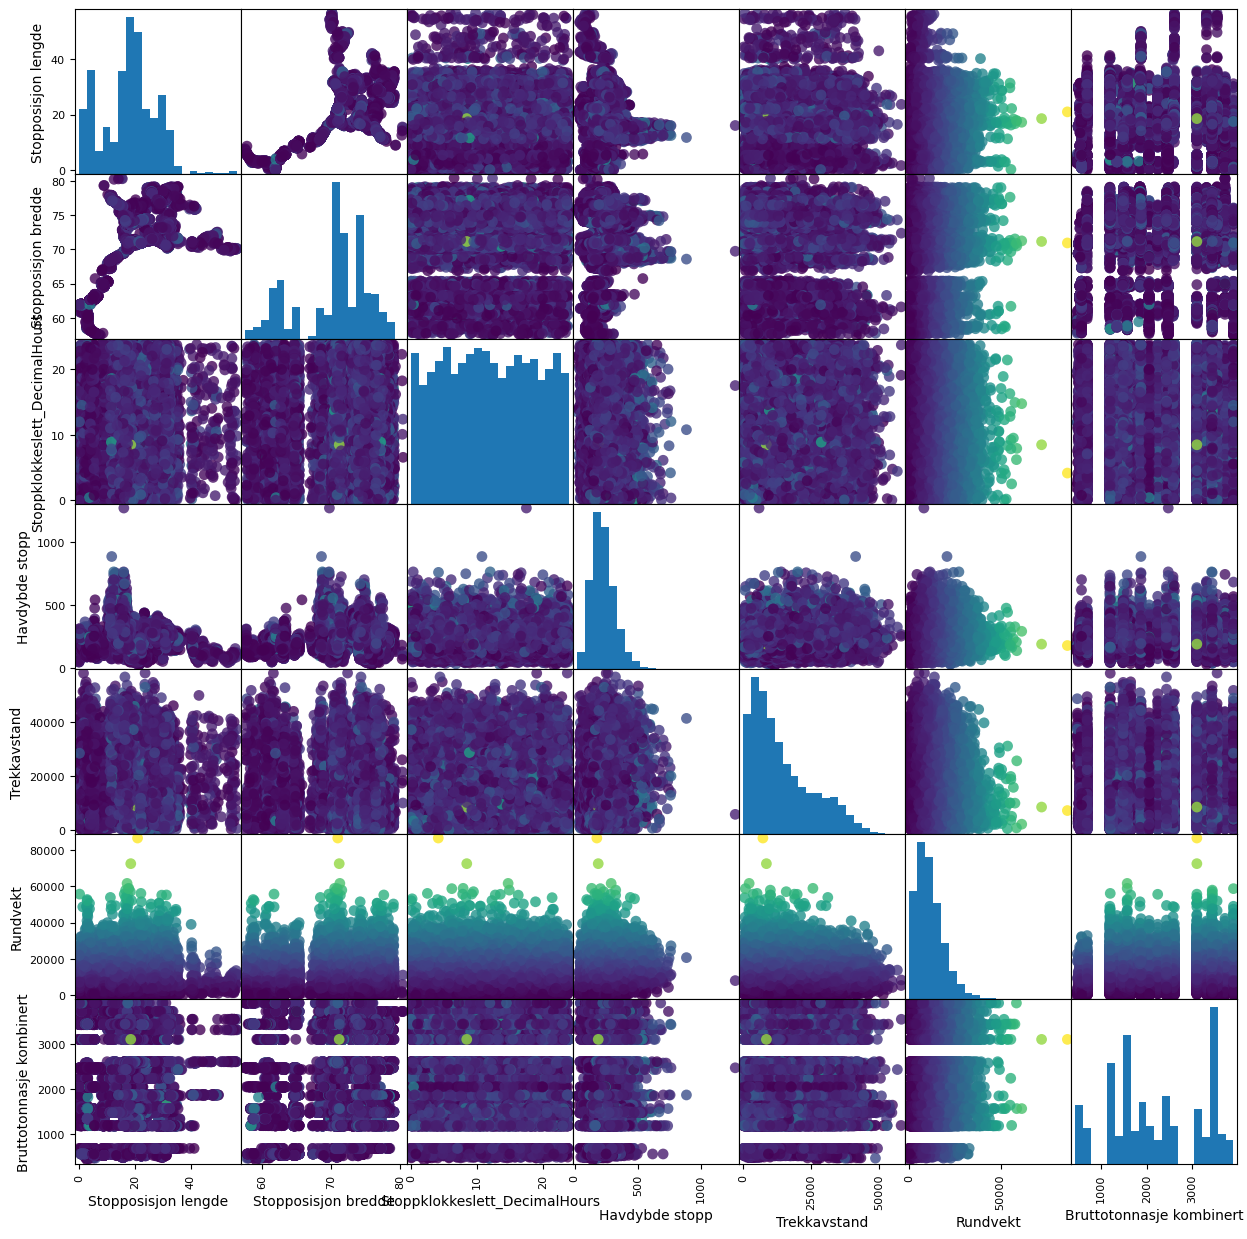

In [20]:
features = ['Stopposisjon lengde', 
            'Stopposisjon bredde', 
            'Stoppklokkeslett_DecimalHours', 
            'Havdybde stopp', 
            'Trekkavstand',  
            'Rundvekt', 
            'Bruttotonnasje kombinert']

target = 'Rundvekt'

plot_frame = cleaned_df[features]  # Append 'Rundvekt' to include it in the DataFrame for plotting

# Generate the scatter matrix plot
grr = pd.plotting.scatter_matrix(
    plot_frame, c=plot_frame['Rundvekt'], figsize=(15, 15), marker='o', hist_kwds={'bins':20}, s=60, alpha=.8
    )


In [21]:
features = [#'Stopposisjon lengde', 
            #'Stopposisjon bredde', 
            'Stoppklokkeslett_DecimalHours', 
            'Havdybde stopp', 
            'Trekkavstand',  
            'Rundvekt',
            'Bruttotonnasje kombinert'
            ]

data = cleaned_df[features]
predict = 'Trekkavstand'

X = np.array(data.drop([predict], axis=1))
y = np.array(data[predict])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
score = linear.score(x_test, y_test)
print(score)

0.045134167155610805


In [22]:
cleaned_df.head()

,Melding ID,Stopposisjon lengde,Stopposisjon bredde,Stoppklokkeslett,Stoppklokkeslett_DecimalHours,Stoppklokkeslett_Radians,Stoppklokkeslett_TimeSin,Havdybde stopp,Trekkavstand,Redskap FDIR,Hovedart FAO,Art FAO,Art - gruppe,Rundvekt,Bruttotonnasje kombinert
0,1497178,15.969,74.914,04-16,4.266667,1.117011,0.898794,334,3970.0,Bunntrål,Hyse,"Hyse, Torsk, Blåkveite, Sei","Hyse, Torsk, Blåkveite, Sei",18434.0,1476.0
1,1497178,16.248,74.901,10-15,10.250000,2.683444,0.442289,277,11096.0,Bunntrål,Hyse,"Hyse, Torsk, Blåkveite, Flekksteinbit, Sei, Kv...","Hyse, Torsk, Blåkveite, Steinbiter, Sei, Annen...",16062.0,1476.0
2,1497178,15.742,74.924,16-49,16.816667,4.402593,-0.952396,496,10215.0,Bunntrål,Hyse,"Hyse, Torsk, Blåkveite, Sei, Snabeluer, Uer (v...","Hyse, Torsk, Blåkveite, Sei, Uer",17878.0,1476.0
3,1497178,15.894,74.926,21-47,21.783333,5.702863,-0.548293,358,3214.0,Bunntrål,Torsk,"Torsk, Hyse","Torsk, Hyse",13780.0,1476.0
4,1497311,28.390,73.187,18-36,18.600000,4.869469,-0.987688,258,7028.0,Bunntrål,Torsk,"Torsk, Hyse, Flekksteinbit","Torsk, Hyse, Steinbiter",4131.0,1874.0


In [23]:
# Ser at det er fiske hvor rundvekt er rapportert til 0. Men Art og Hovedart er rapportert inn. Vi kan anta at det er feilrapporteringer.
rundvekt_zero = cleaned_df[cleaned_df['Rundvekt'] == 0]
rundvekt_zero['Stoppklokkeslett'].value_counts()

Series([], Name: count, dtype: int64)

In [24]:
cleaned_df['Stoppklokkeslett_DecimalHours'].value_counts()

Stoppklokkeslett_DecimalHours
0.016667     57
0.033333     49
0.083333     40
18.000000    39
12.000000    37
             ..
23.950000     3
23.866667     2
23.916667     1
23.833333     1
23.966667     1
Name: count, Length: 1439, dtype: int64

Removing rows with extreme values that are likely errors is an important step in data cleaning and preprocessing. These outliers can skew your analysis and model results, so it's wise to address them early in the process. Here's a recommended sequence of steps for data preprocessing, including where to handle extreme values:

1. Data Cleaning
Handle Missing Values: Before dealing with extreme values, first address missing data in your DataFrame. This could involve filling in missing values with a central tendency measure (mean, median) or a placeholder value, or dropping rows or columns with missing values.
Remove Duplicates: Check for and remove any duplicate rows in your dataset, as they can also skew your analysis.
2. Data Transformation
Normalization/Standardization: If your analysis requires it, normalize or standardize your data. This step is more about preparing your data for modeling rather than cleaning, but it's good to be aware of the need for it.
3. Handling Extreme Values (Outliers)
Identify Outliers: Use statistical methods (e.g., Z-scores, IQR) to identify outliers. Visualization tools like box plots can also help visualize extreme values.
Remove or Adjust Outliers: Once identified, you can decide to remove these rows or adjust the values. Removing should be done if you're confident the extreme values are errors or too atypical. Adjustment might involve capping values at a certain threshold.
4. Feature Engineering
Create or Transform Features: Based on your analysis needs, you might create new features or transform existing ones to better suit your models or analyses.
5. Data Reduction
Dimensionality Reduction: If you have a very large number of features, consider methods like PCA (Principal Component Analysis) to reduce the number of dimensions.
6. Splitting the Dataset
Train/Test Split: Finally, split your dataset into training and testing sets to prepare for machine learning modeling.
Incorporating the step to remove or adjust extreme values after handling missing values and before diving deep into feature engineering ensures that your dataset is clean and ready for further analysis or modeling. This sequence helps maintain the integrity of your analysis and the performance of any predictive models you might build.

Remember, each dataset and analysis goal is unique, so while this sequence is a good general guideline, you might need to adjust the order based on your specific needs and findings as you explore and clean your data.

In [25]:
cleaned_df.columns

Index(['Melding ID', 'Stopposisjon lengde', 'Stopposisjon bredde',
       'Stoppklokkeslett', 'Stoppklokkeslett_DecimalHours',
       'Stoppklokkeslett_Radians', 'Stoppklokkeslett_TimeSin',
       'Havdybde stopp', 'Trekkavstand', 'Redskap FDIR', 'Hovedart FAO',
       'Art FAO', 'Art - gruppe', 'Rundvekt', 'Bruttotonnasje kombinert'],
      dtype='object')

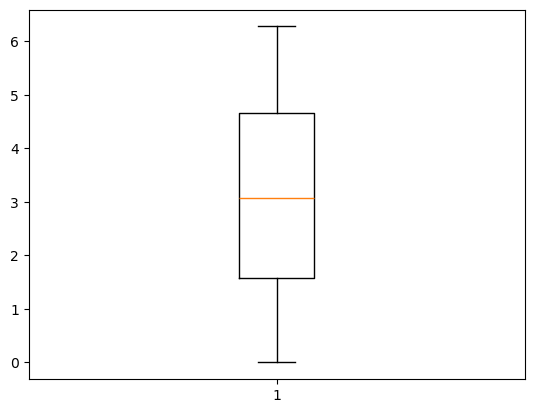

In [26]:
plt.boxplot(cleaned_df['Stoppklokkeslett_Radians'])
plt.show()

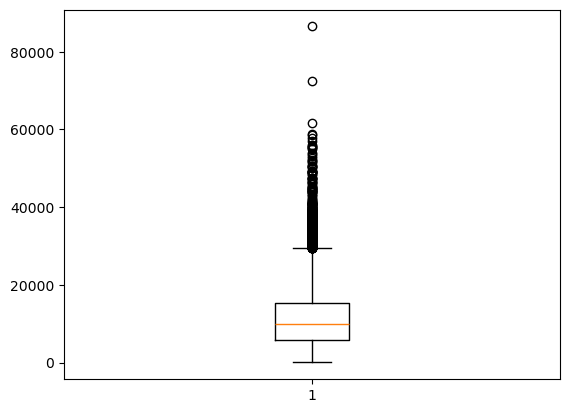

In [27]:
plt.boxplot(cleaned_df['Rundvekt'])
plt.show()

In [28]:
mean = cleaned_df['Trekkavstand'].mean()
std_dev = cleaned_df['Trekkavstand'].std()
# Keep only the ones that are within +3 to -3 standard deviations in the column 'column'.
df_filtered = cleaned_df[(df['Trekkavstand'] > (mean - 3 * std_dev)) & (cleaned_df['Trekkavstand'] < (mean + 3 * std_dev))]


/var/folders/87/czlwvtcd4j3cz6jlhc_45ld00000gn/T/ipykernel_2811/2289215874.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = cleaned_df[(df['Trekkavstand'] > (mean - 3 * std_dev)) & (cleaned_df['Trekkavstand'] < (mean + 3 * std_dev))]


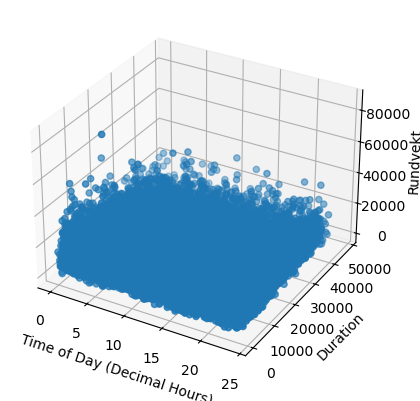

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming cleaned_df['Rundvekt'], cleaned_df['Stoppklokkeslett_DecimalHours'], and cleaned_df['Trekkavstand'] 
# are your data for rundvekt, time_of_day, and duration respectively

rundvekt = df_filtered['Rundvekt']
time_of_day = df_filtered['Stoppklokkeslett_DecimalHours']
length = df_filtered['Trekkavstand']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(time_of_day, length, rundvekt)

ax.set_xlabel('Time of Day (Decimal Hours)')
ax.set_ylabel('Duration')
ax.set_zlabel('Rundvekt')

plt.show()
